<a href="https://colab.research.google.com/github/odu-cs625-datavis/public-fall24-mcw/blob/main/Marks_Channels_Seaborn_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marks and Channels with Seaborn Objects Tutorial

Marks, channels, and data types are the building blocks of creating charts and visualizations. We will use this terminology in our coding examples.

From Chapter 5 in [VAD](https://www.cs.ubc.ca/~tmm/vadbook/):
* "*marks* are the basic geometric elements that depcit items or links"
* "*channels* control their [marks] appearance"
* "the effectiveness of a channel for encoding data depends on its *type*"

References:
* A Quick Introduction to the Seaborn Objects System, https://www.sharpsightlabs.com/blog/seaborn-objects-introduction/
* The seaborn.objects interface, https://seaborn.pydata.org/tutorial/objects_interface.html
* Properties of Mark objects, https://seaborn.pydata.org/tutorial/properties.html

To work along with this tutorial, sign in to your Google account and File > Save a copy in Drive.

## Data

First, we'll import the dataset that we'll use for this tutorial.  We will visualize global health and population measures for countries of the world, recorded over the years 1955 to 2005. The data was collected by the [Gapminder Foundation](https://www.gapminder.org/) and shared in [Hans Rosling's popular TED talk](https://www.youtube.com/watch?v=hVimVzgtD6w). (If you haven't seen the talk, I encourage you to watch it!)

(The vega-datasets GitHub repo has lots of sample datasets that you can use to practice, see https://github.com/vega/vega-datasets/blob/main/SOURCES.md.)

We'll use Pandas to import the gapminder.json datafile into a dataframe.

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('https://cdn.jsdelivr.net/npm/vega-datasets@2/data/gapminder.json')

In [3]:
print (df.head())

   year      country  cluster       pop  life_expect  fertility
0  1955  Afghanistan        0   7971931        43.88       7.42
1  1960  Afghanistan        0   8622466        45.03       7.38
2  1965  Afghanistan        0   9565147        46.13       7.35
3  1970  Afghanistan        0  10752971        47.08       7.40
4  1975  Afghanistan        0  12157386        47.55       7.54


For each `country` and `year` (in 5-year intervals), we have measures of fertility in terms of the number of children per woman (`fertility`), life expectancy in years (`life_expect`), and total population (`pop`).

Next, we'll create some smaller dataframes that we'll use later. The one below should contain the data only for the year 2000.

In [4]:
df_2000 = df.query("year == 2000")
print (df_2000.head())

    year      country  cluster       pop  life_expect  fertility
9   2000  Afghanistan        0  19542982        54.73       7.53
20  2000    Argentina        3  37070774        74.22       2.59
31  2000    Australia        4  19017963        79.72       1.77
42  2000      Austria        1   8010428        78.49       1.36
53  2000      Bahamas        3    325014        71.25       2.10


This one has data for countries labeled cluster 1 in the year 2000.

In [5]:
df_2000c1 = df_2000.query("cluster == 1")
print(df_2000c1.head())

     year  country  cluster       pop  life_expect  fertility
42   2000  Austria        1   8010428        78.49       1.36
86   2000  Belgium        1  10264343        78.04       1.66
174  2000  Croatia        1   4548434        74.65       1.47
240  2000  Finland        1   5176209        78.04       1.73
251  2000   France        1  58665453        79.19       1.88


We'll also create a dataset that has values only for the US.

In [6]:
df_US = df.query("country == 'United States'")
print(df_US.head())

     year        country  cluster        pop  life_expect  fertility
660  1955  United States        3  161136449        69.86       3.47
661  1960  United States        3  176188578        70.06       3.58
662  1965  United States        3  189703283        70.37       2.87
663  1970  United States        3  200328340        70.93       2.47
664  1975  United States        3  211274535        72.73       1.77


Finally, we'll have a set with only a few countries.

In [7]:
df_5countries = df.query("country in ('United States', 'France', 'Austria', 'Brazil', 'Germany')")
print(df_5countries.head())

    year  country  cluster      pop  life_expect  fertility
33  1955  Austria        1  6946260        67.68       2.29
34  1960  Austria        1  7046553        68.96       2.70
35  1965  Austria        1  7269888        70.09       2.70
36  1970  Austria        1  7465301        70.21       2.30
37  1975  Austria        1  7576926        71.44       1.82


## Seaborn's Objects Interface

In September 2022, the seaborn.objects interface was released. It is based on the [Grammar of Graphics](https://vita.had.co.nz/papers/layered-grammar.pdf), which is what R's [ggplot2](https://ggplot2.tidyverse.org/) is also based on. So, if you've created charts in R before, this should be a bit familiar. It also follows along with the VAD textbook's terminology of marks and channels.

First, we need to import the library:

In [8]:
import seaborn as sns
import seaborn.objects as so

Every Seaborn Objects chart uses the [`so.Plot()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.html) function.

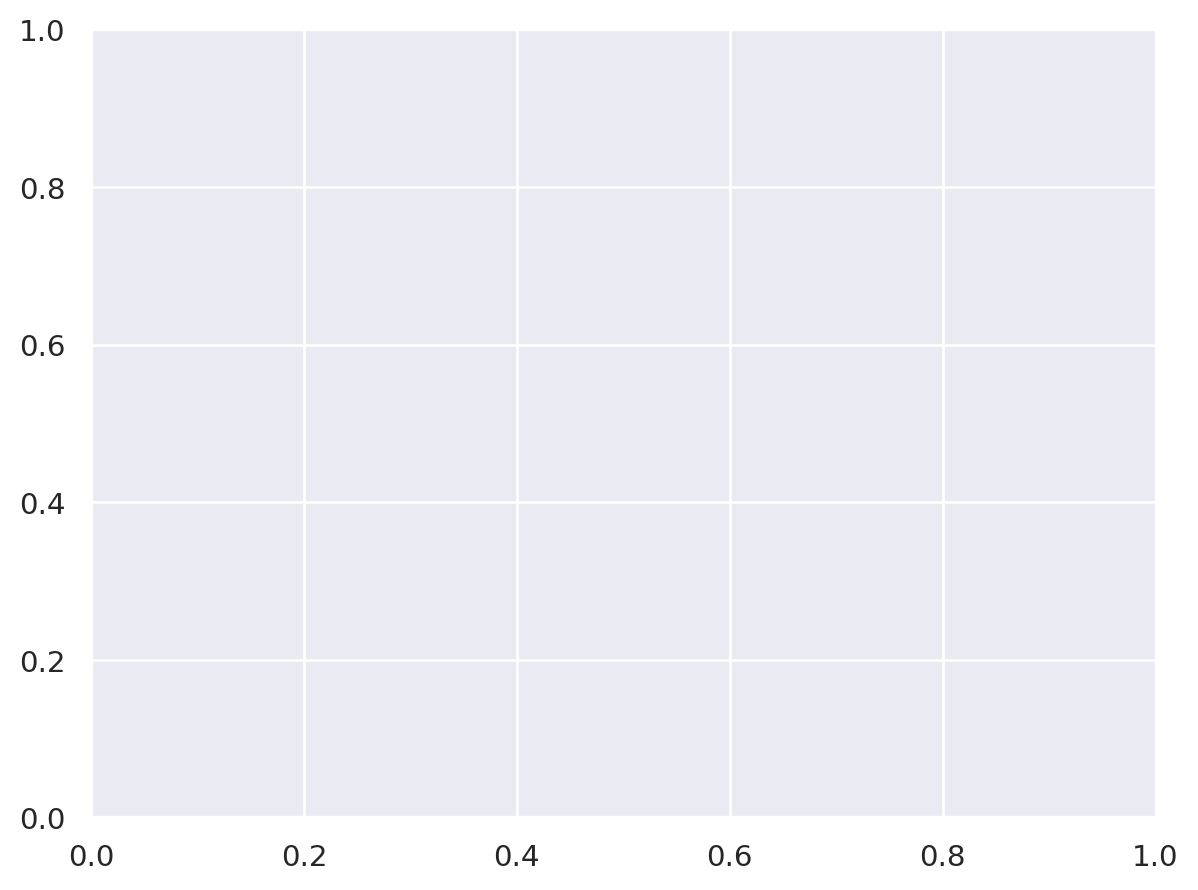

In [9]:
so.Plot()

Note that inside the notebook environment, you don't need to explicitly call the [`show()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.show.html) function, but if you want to run these scripts locally, you'll need to add `.show()` as the final command: `so.Plot().show()`

`so.Plot()` takes several parameters, the most important of which are `data`, `x`, and `y`. As you might expect, `data` specifies the dataframe to use.

Most charts will map data to the position channels, so `x` specifies the attribute (column in the dataframe) to be mapped to the horizontal position *channel*, and `y` specifies the attribute to be mapped to the vertical position *channel*.

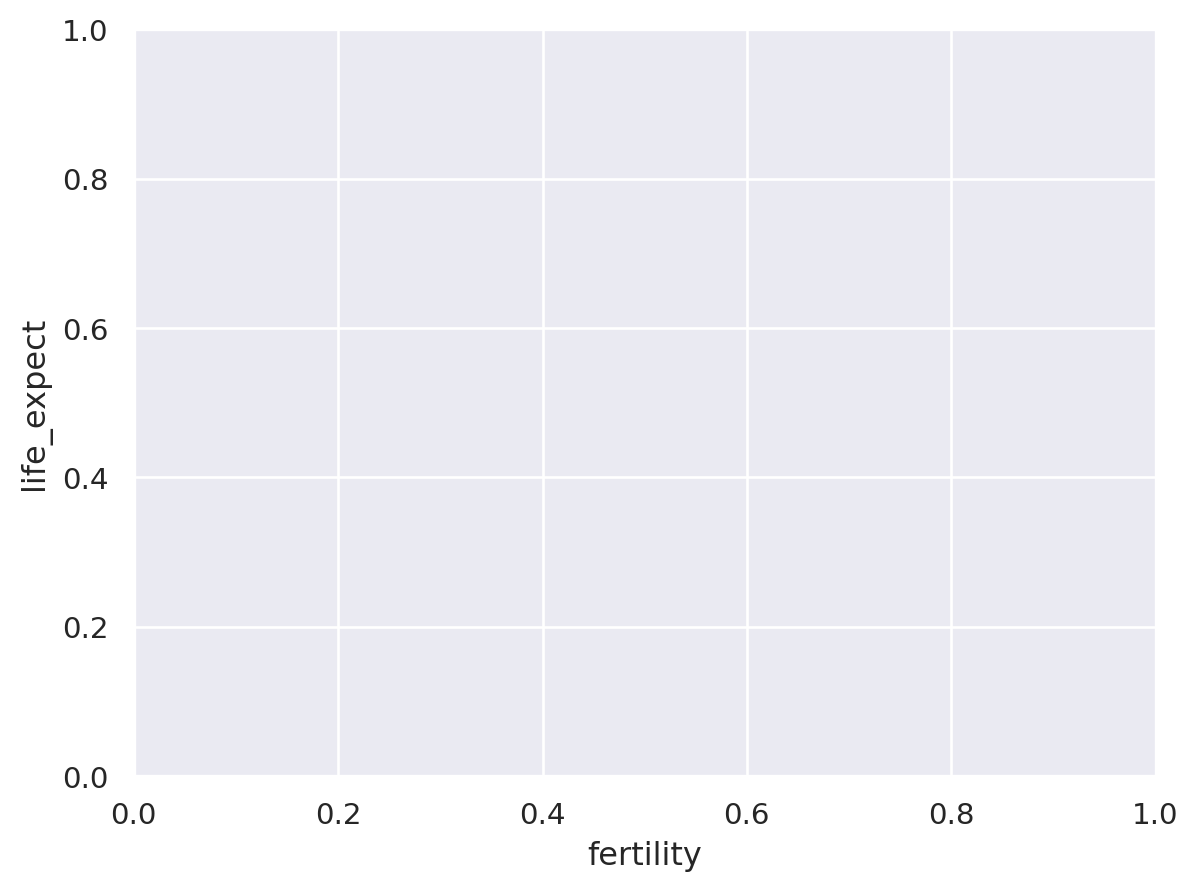

In [10]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect')
)

The axes are set, but there's nothing in the chart because no *mark* has been specified.  That's where the `add()` function comes in.

There are several types of marks available ([full list](https://seaborn.pydata.org/api.html#mark-objects)).  Some of the more common are [`so.Dot()`](https://seaborn.pydata.org/generated/seaborn.objects.Dot.html), [`so.Line()`](https://seaborn.pydata.org/generated/seaborn.objects.Line.html), [`so.Bar()`](https://seaborn.pydata.org/generated/seaborn.objects.Bar.html), and [`so.Area()`](https://seaborn.pydata.org/generated/seaborn.objects.Area.html).

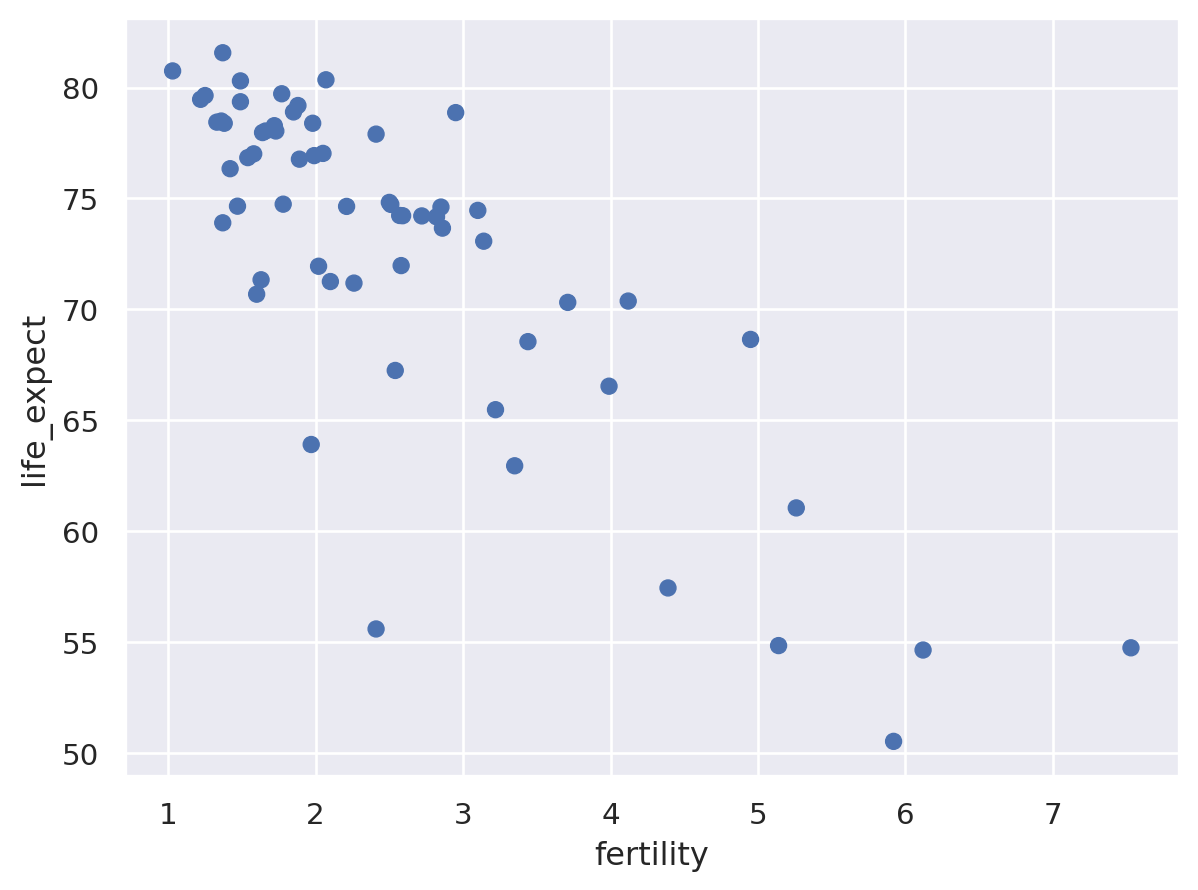

In [11]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect')
  .add(so.Dot())
)

## Adding Channels

We can apply additional channels to the marks by specifying them as parameters to `so.Plot()`.

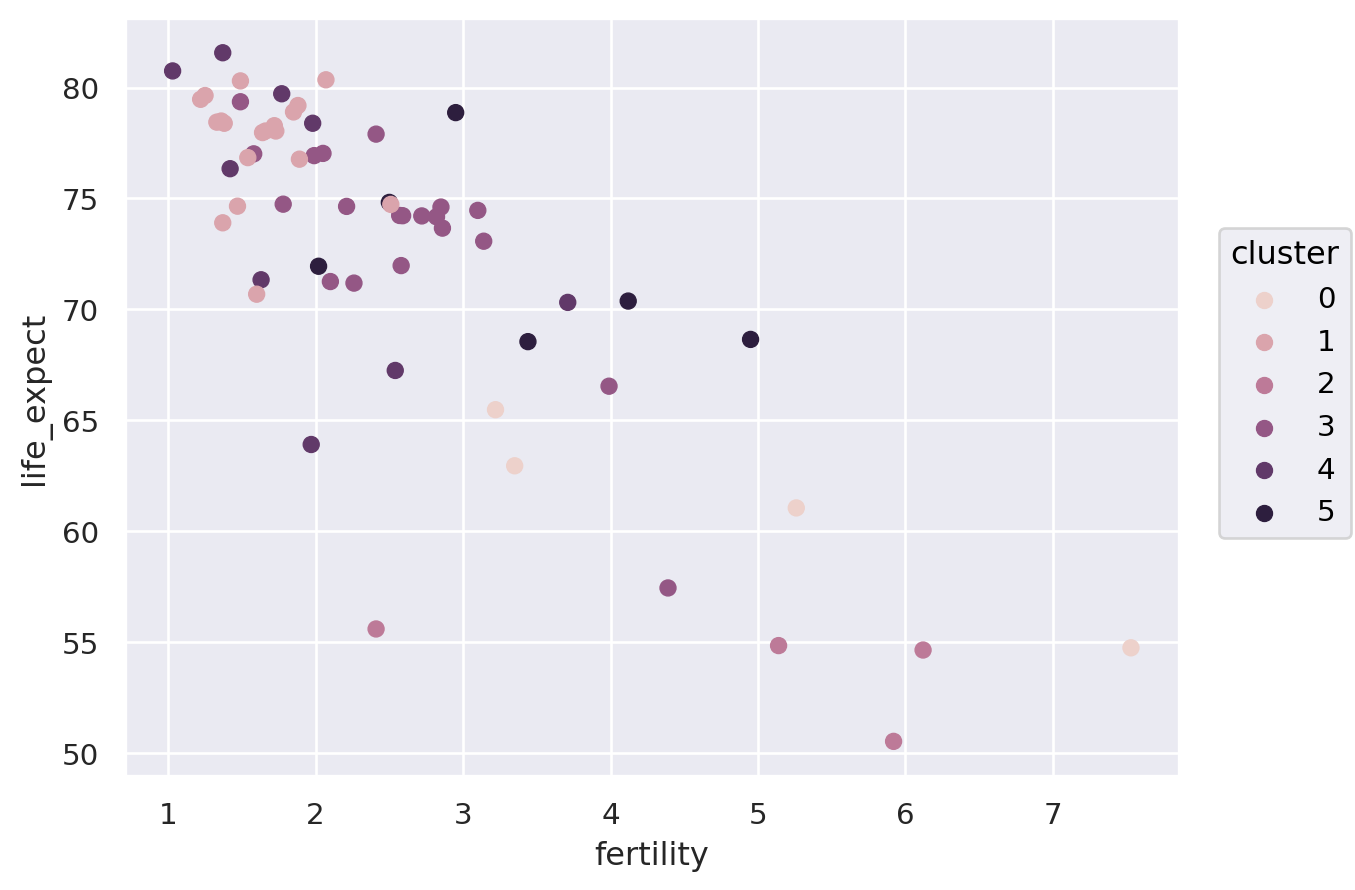

In [12]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster')
  .add(so.Dot())
)

A key thing to note is that when you set `color` in the `Plot()` function, it *maps* the channel to the data. If you set the color in the `Dot()` function, it sets the color directly (i.e., it's not tied to the data).

You can see the difference between *mapping* color and *setting* color below.

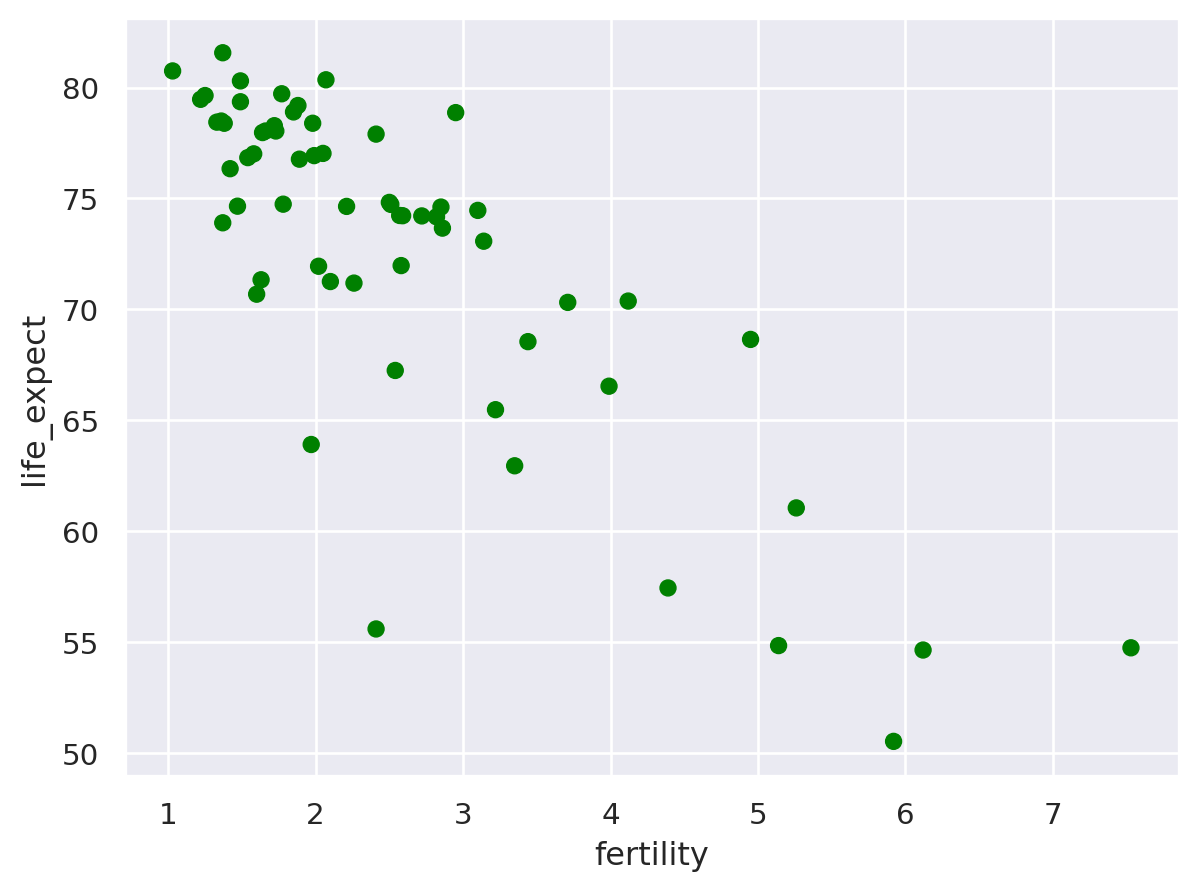

In [13]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect')
  .add(so.Dot(color="green"))
)

We can apply the shape channel to point marks using the [`marker`](https://seaborn.pydata.org/tutorial/properties.html#marker) property.

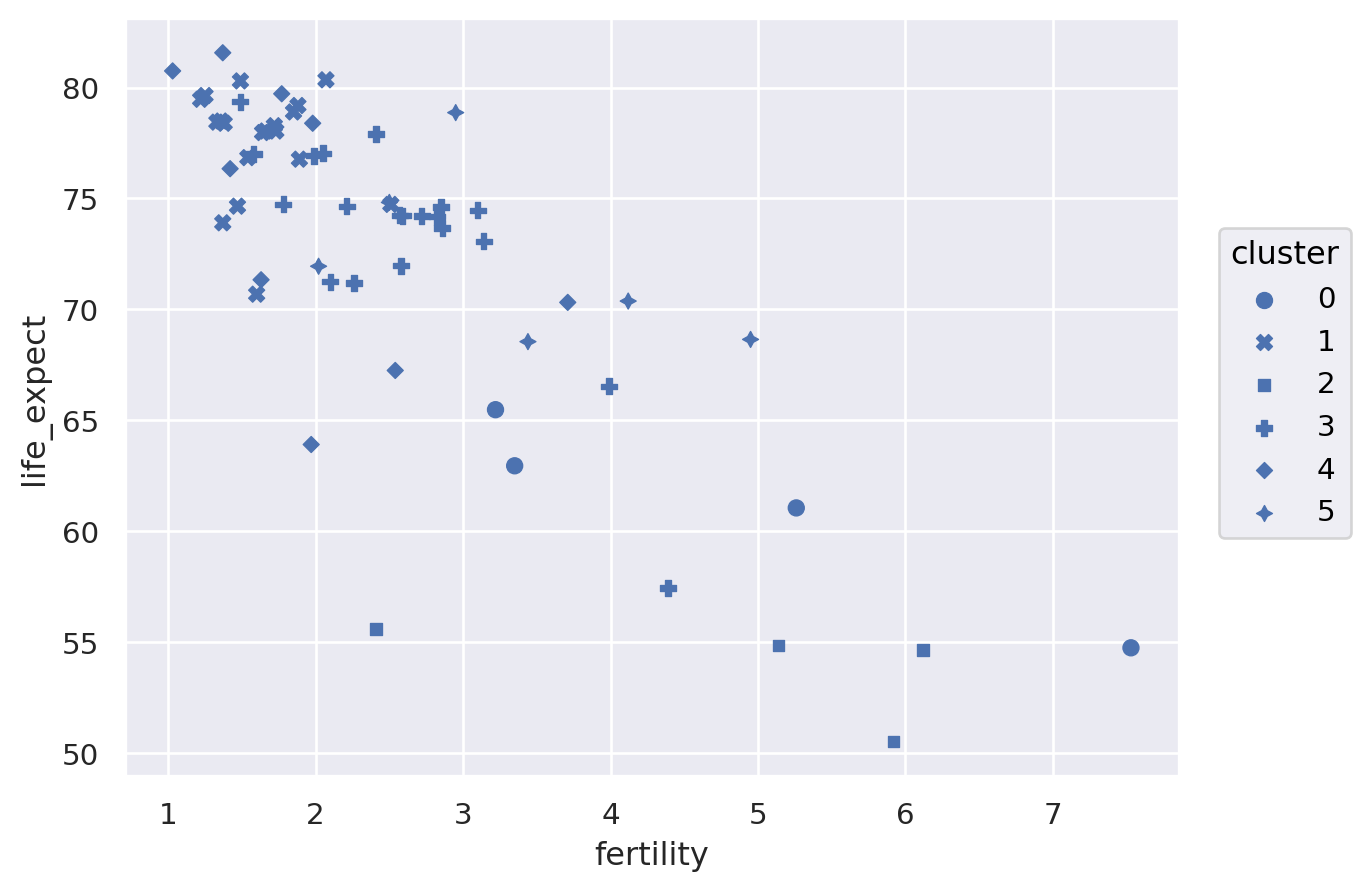

In [14]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         marker='cluster')
  .add(so.Dot())
)

We can add more channels, like combining color and size.

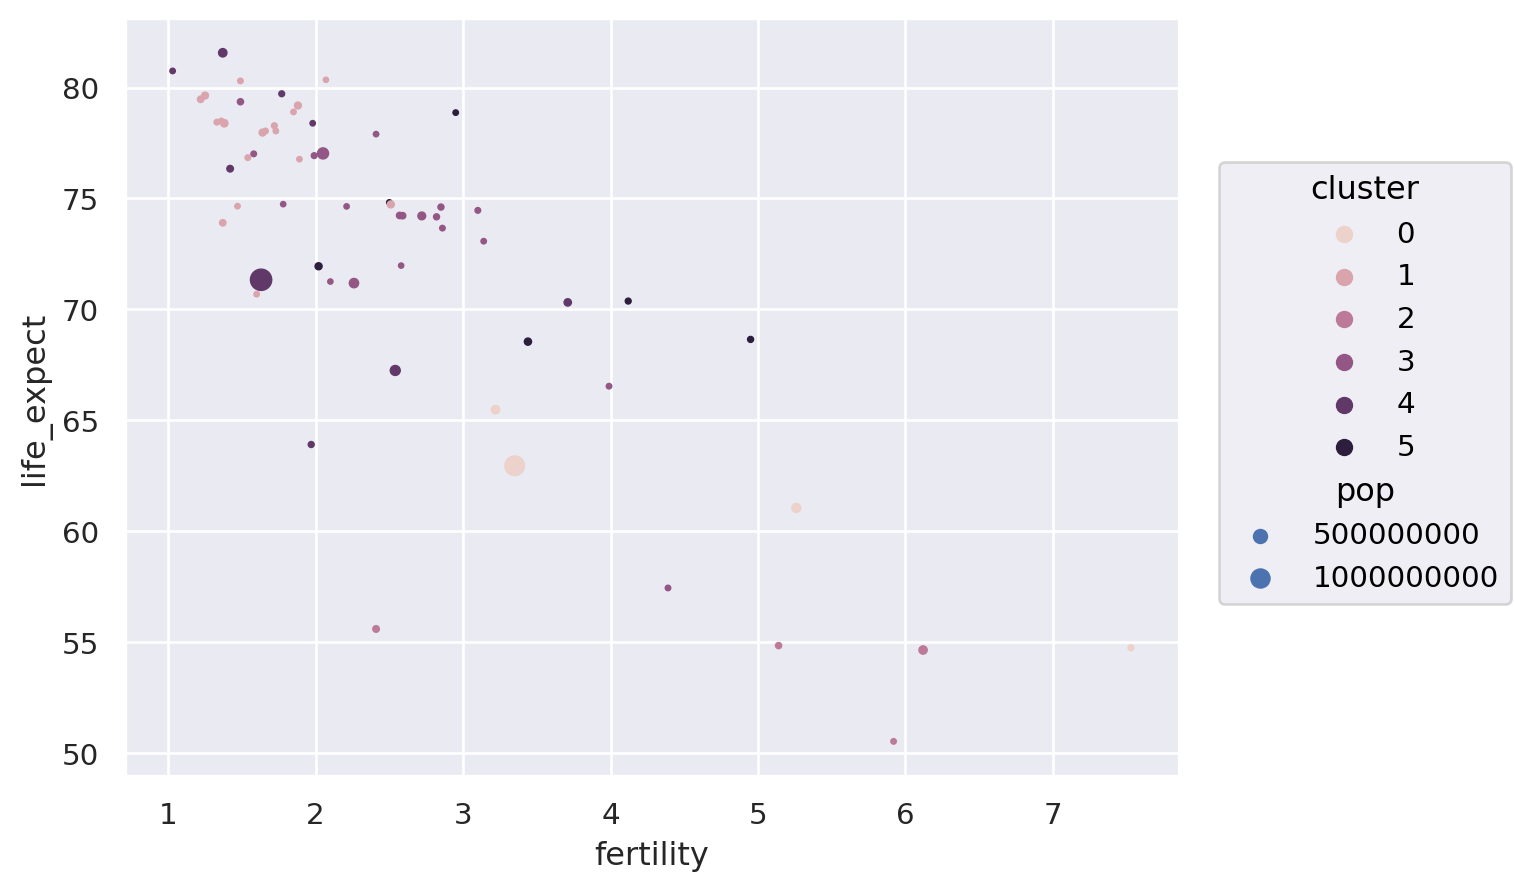

In [15]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dot())
)

### Questions

🚨

<font color='red'>**Q1:**</font> *What happens if you set color in both `Plot()` and `Dot()`?*

👇 Create a new cell and enter the code below.

🚨

<font color='red'>**Q2:**</font> *Can you set the marker type in `Dot()` as you can with color?* (See [marker](https://seaborn.pydata.org/tutorial/properties.html#marker))

👇 Create a new cell and enter the code below.

🚨

<font color='red'>**Q3:**</font> *Can you map two different channels to the same attribute (called [redundant encoding](https://visualthinking.psych.northwestern.edu/projects/redundantencoding.html))?*  

👇 Create a new cell and enter the code below.

🚨

We've seen that when we map a channel other than x or y to an attribute, the values get displayed in the legend.

<font color='red'>**Q4:**</font>  *What happens if you map a channel to the `country` attribute, which has lots of unique items? Which Ch 5 principle, discriminability or separability, is being violated here?*

👇 Create a new cell and enter the code below.

🚨

In the example above where we mapped color to `cluster`, the colors were ordered from lighter to darker. In this dataset, `cluster` is a categorical attribute.

<font color='red'>**Q5:**</font> *What Ch 5 principle is being violated when mapping an ordered channel to a categorical attribute?*

🚨

In all of the above examples, we have mapped `fertility` and `life_expect` to the x and y channels (both representing position on common scale).

<font color='red'>**Q6:**</font> *What Ch 5 principle refers to the importance of the attribute matching the salience, or noticeability, of the channel? What does this say about the implied importance of `fertility` and `life_expect`?*

🚨

To test this out, put `pop` as one of the attributes on either the x or y axis and map `pointsize` to the attribute that you removed from x or y.

👇 Create a new cell and enter the code below.

<font color='red'>**Q7:**</font> *Are you still able to easily see the relationship between `fertility` and `life_expect`?*

🚨

<font color='red'>**Q8:**</font> *In the example above where we mapped pointsize to `pop` and color to `cluster`, what Ch 5 principle should we be concerned about?*

## Marks Other than Dot

We can use a line mark as a connector between points.  We can add multiple marks by including more `add()` functions (in this example, both points and lines).

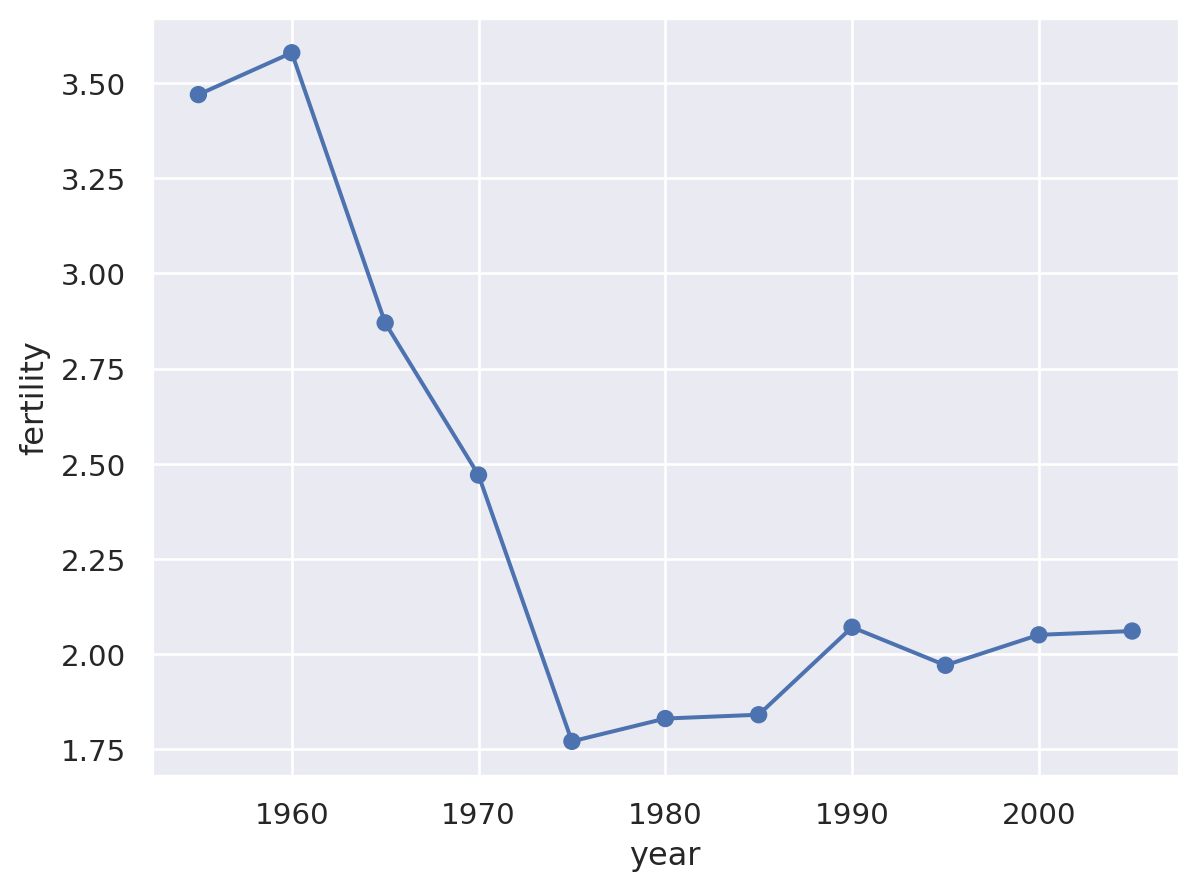

In [16]:
(so.Plot(data= df_US,x='year', y='fertility')
  .add(so.Dot())
  .add(so.Line())
)

We can use color to split items by a categorical value.  Below, we'll map the color channel to country name and when we use lines, we'll get a different color line for each country.

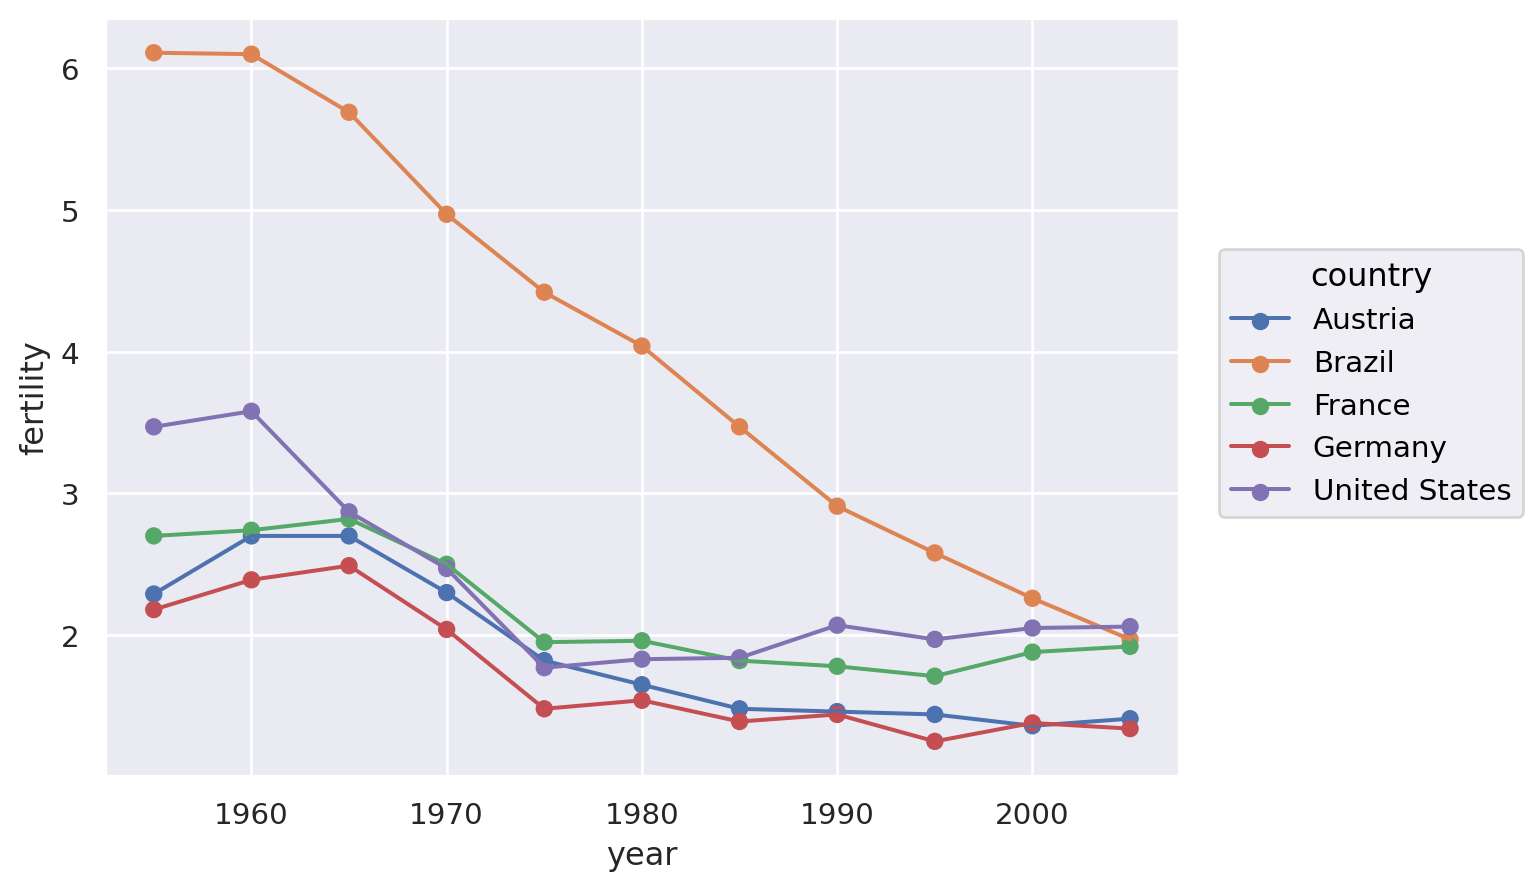

In [17]:
(so.Plot(data=df_5countries,
         x='year',
         y='fertility', color='country')
  .add(so.Dot())
  .add(so.Line())
)

Note that the colors used here different *hues*, so they are appropriate for categorical data.

We can also show this same chart with a filled area.

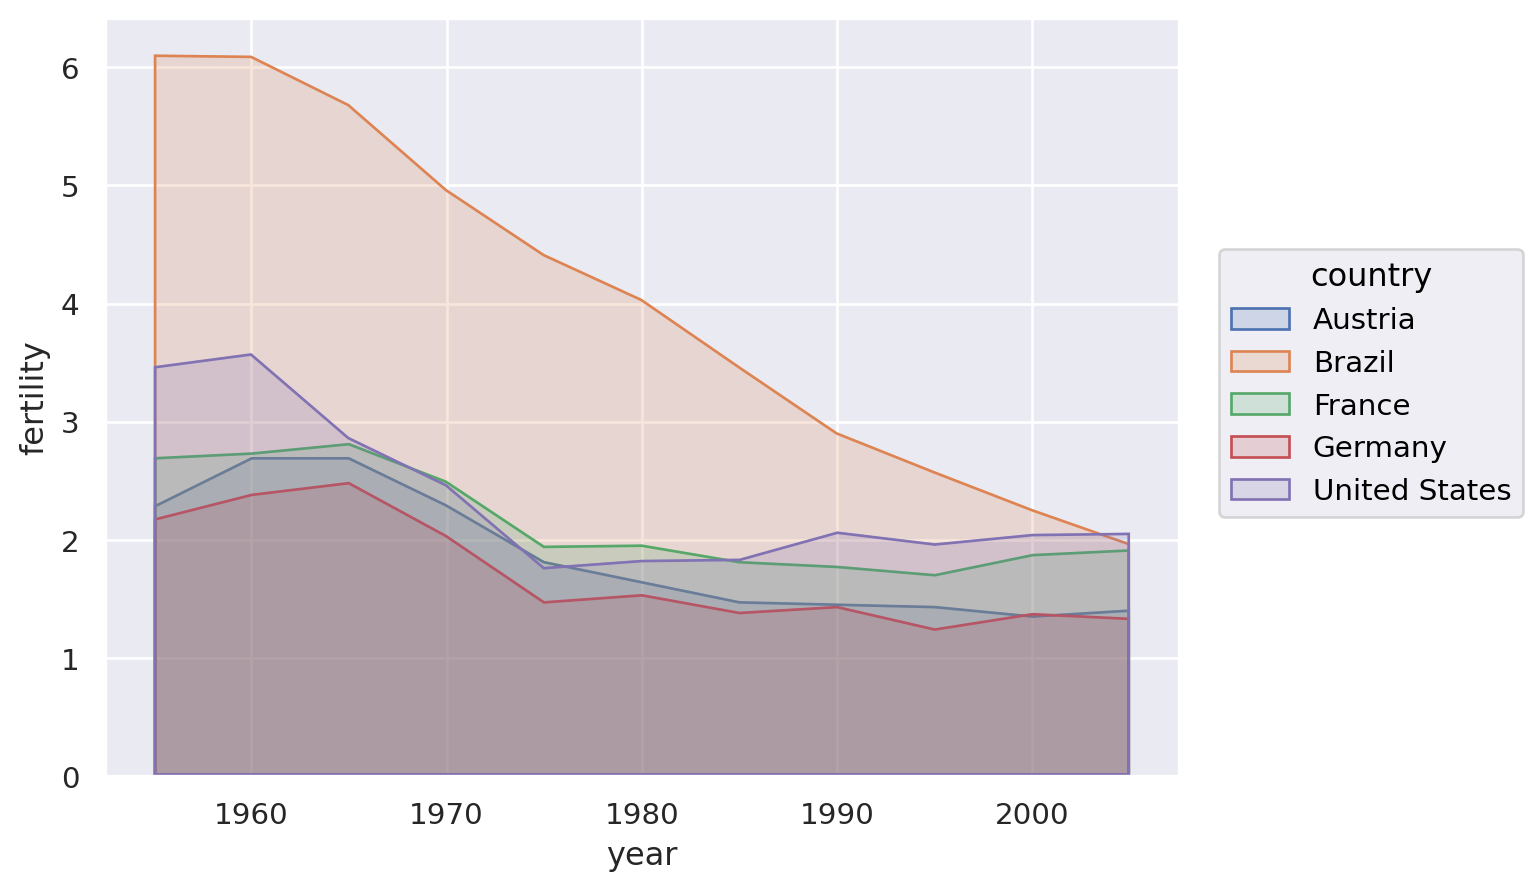

In [18]:
(so.Plot(data=df_5countries, x='year', y='fertility',
         color='country')
  .add(so.Area())
)

Below we use a line mark with horizontal spatial region based on country name and position on the vertical axis based on population. Although we call it a line mark in VAD terminology, it's called a bar mark in Seaborn. You can think of a bar as essentially a thick line.

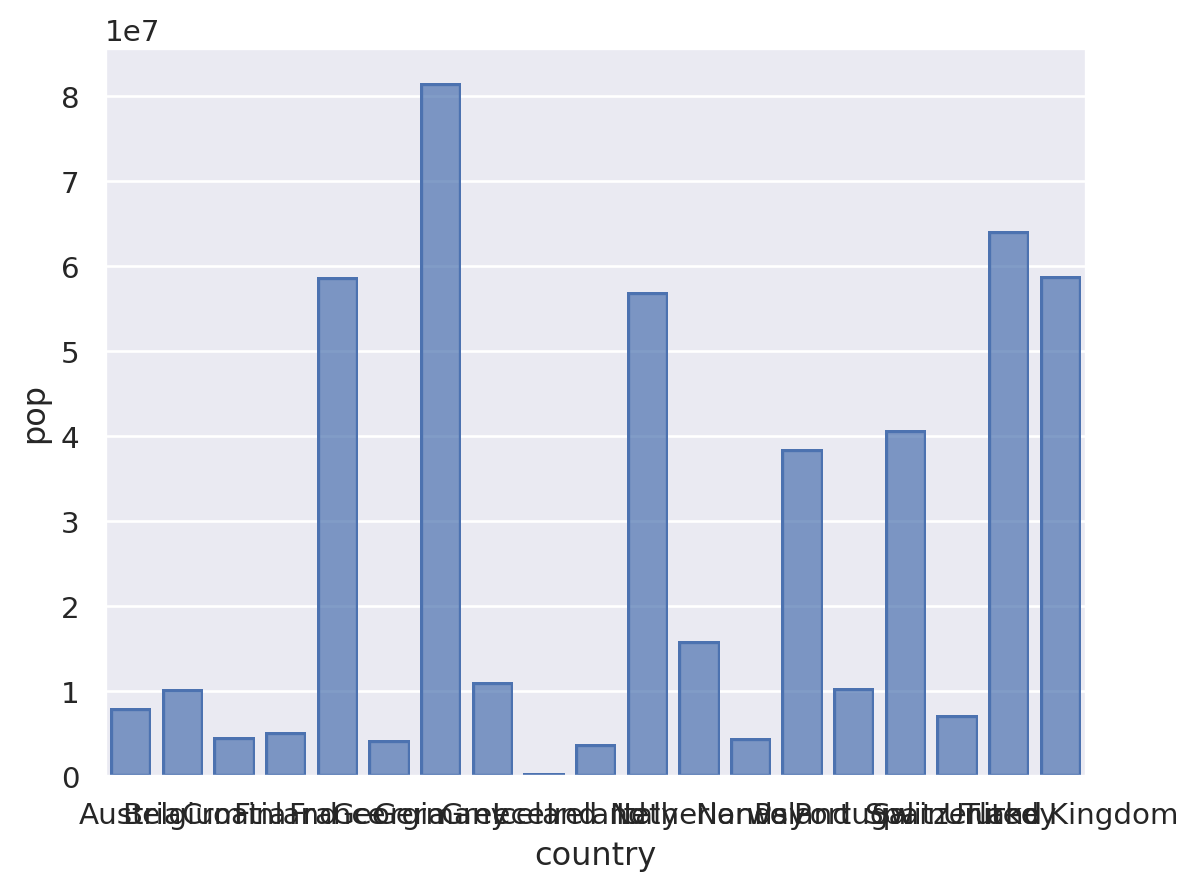

In [19]:
(so.Plot(data=df_2000c1, x='country', y='pop')
  .add(so.Bar())
)

We can flip this so it's more readable and map the country name to the vertical spatial region, just by swapping the x and y parameters.

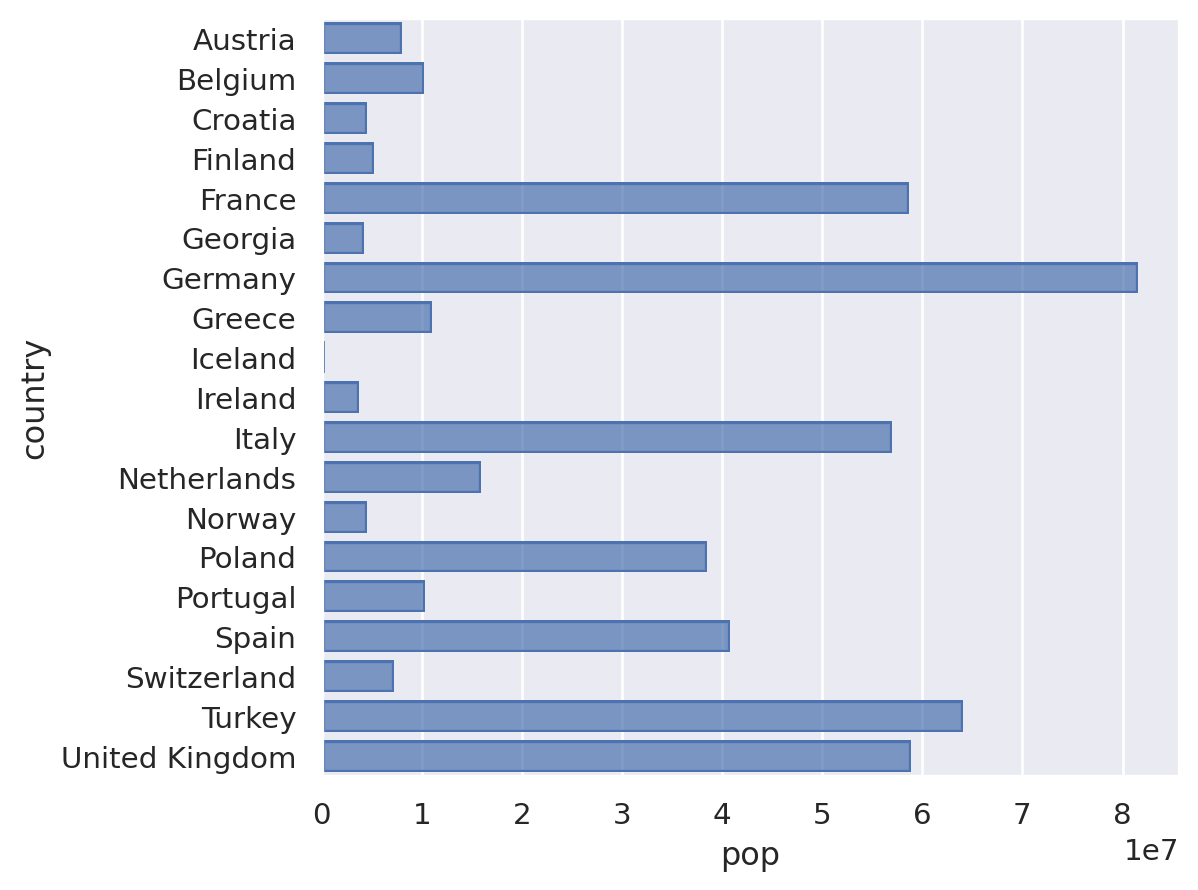

In [20]:
(so.Plot(data=df_2000c1, y='country', x='pop')
  .add(so.Bar())
)

Instead of sorting by the categorical value, we'll usually want to sort by the quantitative value. We can do that here by sorting the underlying dataset using [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html). This can be done in a separate line or as part of the `data` parameter, as I'm showing here.

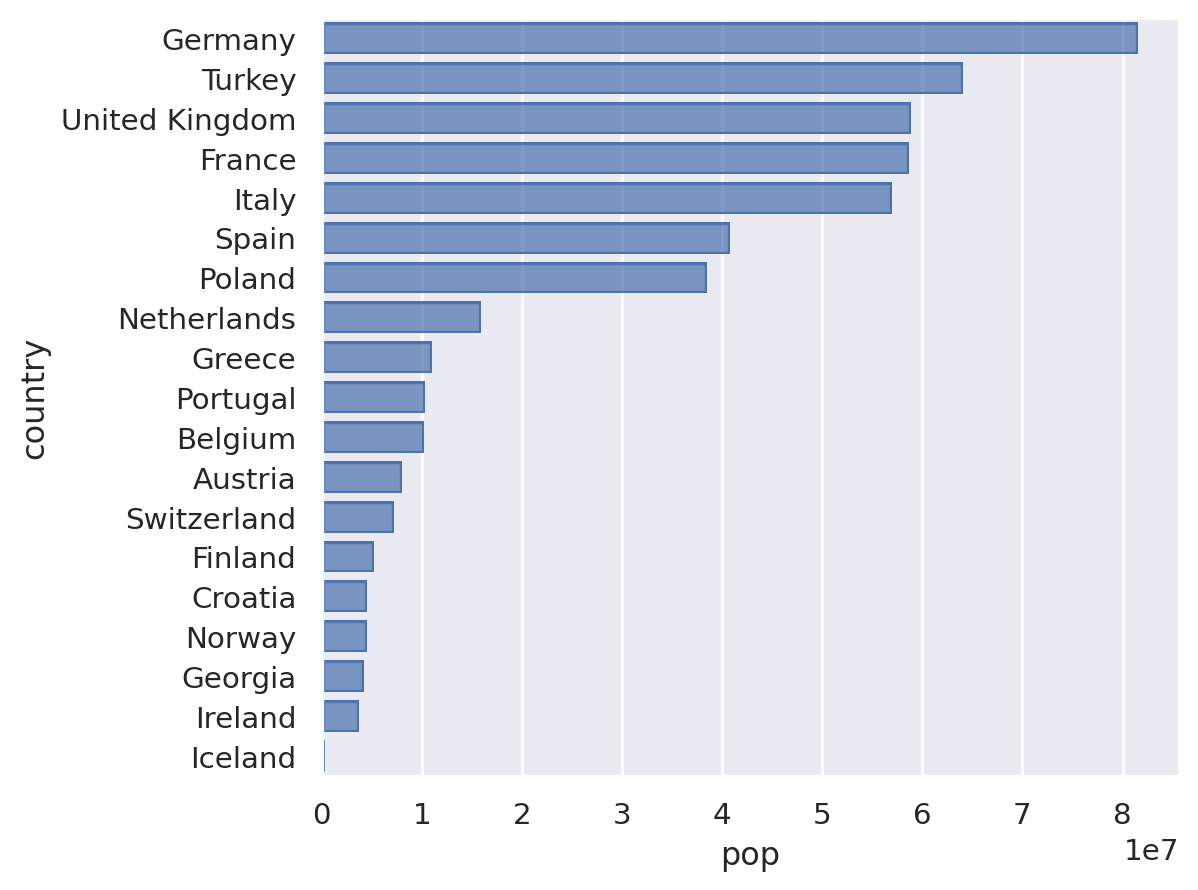

In [21]:
(so.Plot(data=df_2000c1.sort_values(by=['pop'],ascending=False),
         y='country', x='pop')
  .add(so.Bar())
)